**使用卷积网络给狗子图片分类**
<br>对于卷积网络来说,MINIST手写数字识别就比较简单,轻松的就可以达到99%的准确率。
<br>**图像数据的读入工作**
<br>训练网络之前，先去准备数据，把不同的目录的图像全部都整理到同一个目录当中，并且将他们都整合到python特征张量数组里面，然后进行乱序排列。那么这个输入结构应该是4D张量,形状是(样本,图像高度,图像宽度,颜色深度)
<br>相对的，也要把目录名整理到一个同样长度的1D标签张量中，次序和特征张量一致
<br>1. 数据的读入
<br>先显示一下images目录下面的够的种类子目录

In [1]:
import numpy as np
import pandas as pd
import os
print(os.listdir("./annotation/images/Images"))

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [2]:
# 本示例只处理这10种狗
dir = "./annotation/images/"
chihuahua_dir = dir+"/Images/n02085620-Chihuahua" #吉娃娃
Japanese_spaniela_dir = dir+"Images/n02085782-Japanese_spaniel" #日本狆
Maltese_dog_dir = dir+"Images/n02085936-Maltese_dog" #玛尔济斯犬
Pekinese_dir = dir+"Images/n02086079-Pekinese" #北京狮子狗
Shih_Tzu_dir = dir+"Images/n02086240-Shih-Tzu" #西施犬
Blenheim_spaniel_dir = dir+"Images/n02086646-Blenheim_spaniel" #英国可卡犬
papillon_dir = dir+"Images/n02086910-papillon" # 蝴蝶犬
toy_terrier_dir = dir+"Images/n02087046-toy_terrier" #英国玩具梗 
Afghan_hound_dir = dir+"Images/n02088094-Afghan_hound" #阿富汗猎犬
basset_dir = dir+"Images/n02088238-basset" #巴吉度猎犬

下面的部分代码,我们将这10种狗的子目录中的图像和标签值读入到X,y数据集当中:

In [3]:
import cv2
X=[]
y_label=[]
imgsize=150
# 定义一个函数读入狗狗图片
def train_data(label,data_dir):
    print("正在读入:",data_dir)
    for img in os.listdir(data_dir):
        path=os.path.join(data_dir,img)
#         cv2.imread()方法是用来读取图片的,其中的参数IMREAD_COLOR是读入彩色图片
        img=cv2.imread(path,cv2.IMREAD_COLOR)
#         给刚才读入变量img的图片重新定义尺寸,长和宽都重新定义为150px
        img=cv2.resize(img,(imgsize,imgsize))
        X.append(np.array(img))
        y_label.append(str(label))
# 读入10个目录中的狗狗图片
train_data("chihuahua",chihuahua_dir)
train_data("Japanese_spaniela",Japanese_spaniela_dir)
train_data("Maltese_dog",Maltese_dog_dir)
train_data("Pekinese",Pekinese_dir)
train_data("Shih_Tzu",Shih_Tzu_dir)
train_data("Blenheim_spaniel",Blenheim_spaniel_dir)
train_data("papillon",papillon_dir)
train_data("toy_terrier",toy_terrier_dir)
train_data("Afghan_hound",Afghan_hound_dir)
train_data("basset",basset_dir)

正在读入: ./annotation/images//Images/n02085620-Chihuahua
正在读入: ./annotation/images/Images/n02085782-Japanese_spaniel
正在读入: ./annotation/images/Images/n02085936-Maltese_dog
正在读入: ./annotation/images/Images/n02086079-Pekinese
正在读入: ./annotation/images/Images/n02086240-Shih-Tzu
正在读入: ./annotation/images/Images/n02086646-Blenheim_spaniel
正在读入: ./annotation/images/Images/n02086910-papillon
正在读入: ./annotation/images/Images/n02087046-toy_terrier
正在读入: ./annotation/images/Images/n02088094-Afghan_hound
正在读入: ./annotation/images/Images/n02088238-basset


**注意!!!**
<br>这里如果不是在kaggle上运行代码,则需要自行安装opencv_pyhton库。
<br>并且在使用opencv的时候我们应该保持所有的项目和数据集所在目录的绝对路径当中没有中文字符！否则会报错！

下面的代码用来去构建他们,并且将标签从文本转换为One-hot格式的分类编码:

In [4]:
from sklearn.preprocessing import LabelEncoder #导入标签编码
from keras.utils.np_utils import to_categorical # 导入One-hot编码
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y_label) # 标签编码
y= to_categorical(y,10) # 将标签转换为One-hot编码
X=np.array(X) #将X从列表转换为张量数组
# 下面这个语句相当于是手工将图像的像素值进行简单的压缩,也就是将X张量进行归一化,用以利于神经网络处理它
X=X/255 # 将X张量归一化

**接下来我们来显示向量化之后的图像**
<br>输出一下X张量的形状和内容

In [5]:
print("X张量的形状:",X.shape)
print("X张量的第一个数据:",X[1])

X张量的形状: (1922, 150, 150, 3)
X张量的第一个数据: [[[0.22352941 0.21176471 0.60392157]
  [0.19215686 0.16862745 0.58823529]
  [0.27058824 0.21176471 0.67843137]
  ...
  [0.64705882 0.73333333 0.97254902]
  [0.56078431 0.65490196 0.90980392]
  [0.49411765 0.58823529 0.86666667]]

 [[0.47058824 0.40784314 0.8       ]
  [0.39215686 0.3254902  0.75294118]
  [0.4        0.31764706 0.79607843]
  ...
  [0.56470588 0.68627451 0.9372549 ]
  [0.49411765 0.63529412 0.89019608]
  [0.36078431 0.51764706 0.77647059]]

 [[0.67058824 0.57647059 0.94901961]
  [0.58823529 0.49803922 0.90588235]
  [0.45882353 0.36470588 0.83137255]
  ...
  [0.43921569 0.58039216 0.81176471]
  [0.36470588 0.54509804 0.77647059]
  [0.14117647 0.35294118 0.58039216]]

 ...

 [[0.2627451  0.43529412 0.38431373]
  [0.3254902  0.47058824 0.41176471]
  [0.29411765 0.36862745 0.30980392]
  ...
  [0.32156863 0.4627451  0.44313725]
  [0.60392157 0.78431373 0.78431373]
  [0.28235294 0.5254902  0.58431373]]

 [[0.34509804 0.56078431 0.56078431

再输出一下y_train的形状和内容:

In [6]:
print("y张量的形状:",y.shape)
print("X张量的第一个数据:",X[1])

y张量的形状: (1922, 10)
X张量的第一个数据: [[[0.22352941 0.21176471 0.60392157]
  [0.19215686 0.16862745 0.58823529]
  [0.27058824 0.21176471 0.67843137]
  ...
  [0.64705882 0.73333333 0.97254902]
  [0.56078431 0.65490196 0.90980392]
  [0.49411765 0.58823529 0.86666667]]

 [[0.47058824 0.40784314 0.8       ]
  [0.39215686 0.3254902  0.75294118]
  [0.4        0.31764706 0.79607843]
  ...
  [0.56470588 0.68627451 0.9372549 ]
  [0.49411765 0.63529412 0.89019608]
  [0.36078431 0.51764706 0.77647059]]

 [[0.67058824 0.57647059 0.94901961]
  [0.58823529 0.49803922 0.90588235]
  [0.45882353 0.36470588 0.83137255]
  ...
  [0.43921569 0.58039216 0.81176471]
  [0.36470588 0.54509804 0.77647059]
  [0.14117647 0.35294118 0.58039216]]

 ...

 [[0.2627451  0.43529412 0.38431373]
  [0.3254902  0.47058824 0.41176471]
  [0.29411765 0.36862745 0.30980392]
  ...
  [0.32156863 0.4627451  0.44313725]
  [0.60392157 0.78431373 0.78431373]
  [0.28235294 0.5254902  0.58431373]]

 [[0.34509804 0.56078431 0.56078431]
  [0.18

现在我们可以将他缩放到[0,1]区间范围,缩放之后的整长量重新图像的像是显示出来

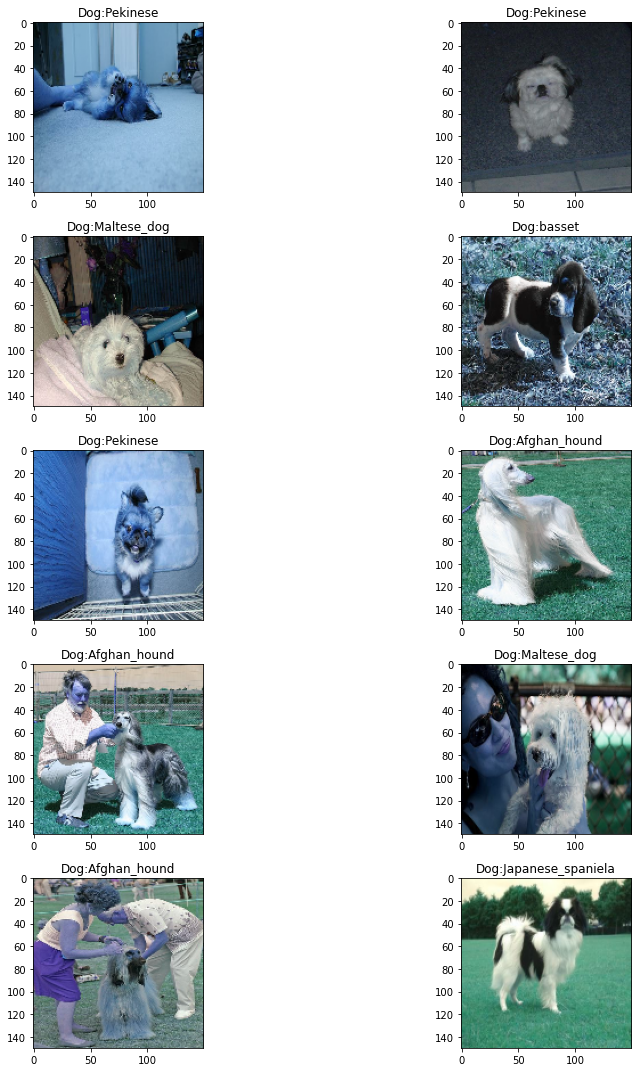

In [7]:
import matplotlib.pyplot as plt #导入maplotlib
import random as rdm # 导入随机数工具
# 随机显示几张可爱的狗狗图片
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        r=rdm.randint(0,len(X))
        ax[i,j].imshow(X[r])
        ax[i,j].set_title("Dog:"+y_label[r])
plt.tight_layout()

随机的打乱顺序拆分训练集和测试集

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

开始构建一个简单的卷积网络

在下面的代码当中,我们对卷积网络进行创建和一系列设置。可以从代码中看到特征图的深度在逐渐增加，从32增加到128，特征图的大小则从150\*150逐渐缩小这时构建卷积网路的创建模式。
<br>因为需要的层类型比较多，所以我们没有逐一导入，而是直接导入了keras当中的所有层，我们简单的介绍一下卷积网络中用到的各个参数和超参数。
Conv2D，他是2D卷积层，对于平面图像进行卷积，卷积层的参数32（3,3），其中32表示的是它的深度，也就是该层的卷积核的个数。也可以理解成通道数，后面（3,3）表示的是卷积窗口的大小。在这第一个卷积层中还通过input_shape=(150,150,3)去指定了输入特征图的形状。···
<br>
<br>全部的卷积层都通过ReLU函数激活。
<br>其实还有其他类型的卷积层，比如用于处理时许卷积的一维卷积层Conv1D等等···
<br> MaxPooling2D，是最大池化层，一般会紧随着卷积层出现，通常采用了2\*2的窗口,他的默认步幅是2.这是将特征图进行2倍下采样，也就是宽高特征各减半。
<br>这种卷积+池化的架构一般要重复棘刺，同时逐渐增加特征的深度。
<br>Flatten()，是展平层，将卷积操作的特征图展平之后，我们才能够输入全连接层进行进一步的处理。
<br>最后还有两个Dense，他们是全连接层。
* 第一个是普通的层，用来计算权重，确定分类。用ReLU函数激活
* 第二个则是只负责了输出分类结果，因为是多分类，所以我们用到了Softmax函数进行激活

在网络编译的时候，需要选择合适的超参数
* 损失函数的选择是categorical_crossentropy，也就是分类交叉熵，它适用于多元分类的问题，用以衡量两个概率分部之间的距离，使之最小化，让输出结果尽可能的接近真实值。
* 优化器的选择是RMSProp。
* 评估指标为准确率acc，等价于accucary。


In [9]:
from keras import layers # 导入所有层
from keras import models # 导入所有模型
cnn = models.Sequential() # 序贯模型
cnn.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3))) # 卷积
cnn.add(layers.MaxPool2D((2,2)))  # 最大池化
cnn.add(layers.Conv2D(64,(3,3),activation="relu")) # 卷积
cnn.add(layers.MaxPool2D((2,2)))  # 最大池化
cnn.add(layers.Conv2D(64,(3,3),activation="relu")) # 卷积
cnn.add(layers.MaxPool2D((2,2)))# 最大池化
cnn.add(layers.Conv2D(64,(3,3),activation="relu")) # 卷积
cnn.add(layers.MaxPool2D((2,2)))# 最大池化 
cnn.add(layers.Flatten())# 展平
cnn.add(layers.Dense(512,activation="relu")) # 全连接
cnn.add(layers.Dense(10,activation="softmax")) # 分类输入
cnn.compile(loss="categorical_crossentropy",optimizer="RMSprop",metrics=["acc"])# 损失函数/优化器/评估指标

训练网络并显示误差和准确率

对网络进行训练（为了简化模型，这里还是直接使用训练集数据进行验证）

In [10]:
# history=cnn.fit(X_train,y_train, #指定训练集
#                 epochs=50, #指定轮次
#                 batch_size=256, #指定批量大小
#                 validation_data=(X_test,y_test))#指定验证集

从上面的结果来看，并不理想，网络基本没有训练起来。验证集的准确率过低了！对于我们划分了10个类别的的多分类问题来说，这样的结果跟瞎猜差不多。
<br>那么我们就需要做一下的内容。
<br>**卷积网络性能优化**
<br>第一步，要更新优化器并设置学习速率
<br>从最简单的修改开始，暂时不改变网络结构，先考虑优化器的调整，并且尝试使用不同的学习速率进行梯度下降。因为很多时候神经网络完全没有训练起来，是因为学习速率设置的不好，请看入下代码：

**调整优化器**

In [11]:
from tensorflow import optimizers #导入优化器
cnn = models.Sequential() #序贯模型
cnn.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
cnn.add(layers.Dropout(0.5)) #Dropout
cnn.add(layers.MaxPool2D((2,2))) # 最大池化
cnn.add(layers.Conv2D(64,(3,3),activation="relu")) # 卷积
cnn.add(layers.MaxPool2D((2,2))) # 最大池化
cnn.add(layers.Dropout(0.5)) #Dropout
cnn.add(layers.Conv2D(128,(3,3),activation="relu")) # 卷积
cnn.add(layers.MaxPool2D((2,2))) # 最大池化
cnn.add(layers.Dropout(0.5)) #Dropout
cnn.add(layers.Conv2D(256,(3,3),activation="relu")) # 卷积
cnn.add(layers.MaxPool2D((2,2))) # 最大池化
cnn.add(layers.Dropout(0.5)) #Dropout
cnn.add(layers.Conv2D(512,(3,3),activation="relu")) # 卷积
cnn.add(layers.MaxPool2D((2,2))) # 最大池化
cnn.add(layers.Dropout(0.5)) #Dropout
cnn.add(layers.Flatten())
cnn.add(layers.Dense(512,activation="relu")) # 全连接
cnn.add(layers.Dense(10,activation="softmax")) # 分类输入
cnn.compile(loss="categorical_crossentropy",#损失函数
           optimizer=optimizers.Adam(lr=1e-4),#更新优化器并设定学习速率
           metrics=["acc"])#评估指标
# history=cnn.fit(X_train,y_train,#指定训练集
#                epochs=50,#指定轮次
#                batch_size=256,#指定批量大小
#                validation_data=(X_test,y_test))#指定验证集

H:\python_work\anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


**添加Dropout层**

In [12]:
cnn = models.Sequential() #序贯模型
cnn.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
cnn.add(layers.MaxPool2D((2,2))) # 最大池化
cnn.add(layers.Conv2D(64,(3,3),activation="relu")) # 卷积
cnn.add(layers.Dropout(0.5)) #Dropout
cnn.add(layers.MaxPool2D((2,2))) # 最大池化
cnn.add(layers.Conv2D(128,(3,3),activation="relu")) # 卷积
cnn.add(layers.Dropout(0.5)) #Dropout
cnn.add(layers.MaxPool2D((2,2))) # 最大池化
cnn.add(layers.Conv2D(256,(3,3),activation="relu")) # 卷积
cnn.add(layers.MaxPool2D((2,2))) # 最大池化
cnn.add(layers.Flatten())
cnn.add(layers.Dropout(0.5)) #Dropout
cnn.add(layers.Dense(512,activation="relu")) # 全连接
cnn.add(layers.Dense(10,activation="sigmoid")) # 分类输入
cnn.compile(loss="categorical_crossentropy",#损失函数
           optimizer=optimizers.Adam(lr=1e-4),#更新优化器并设定学习速率
           metrics=["acc"])#评估指标
# history=cnn.fit(X_train,y_train,#指定训练集
#                epochs=50,#指定轮次
#                batch_size=256,#指定批量大小
#                validation_data=(X_test,y_test))#指定验证集

**数据增强**
<br>下面我们要对卷积网络处理问题的性能进行改善，会用到**数据增强**（data angmentation）。这种方法肯定能够进一步提高计算机视觉问题的准确率，同时降低它的过拟合。

数据增强，能够把一张图像当红层7张8张甚至100张来使用，也就是会在现在的数据样本中生成更多的训练数据。

他是怎么做到的呢？是通过对图像的平移，颠倒，倾斜，虚化，增加噪声等多种手段来实现的。这是利用了能够生成可信图像的随机变换来增加样本数。这样一来，训练集就被大幅度的增强了，不管是图像的数目，还是多样性都会显著增加。因此在训练模型后，能够观察到数据的更多内容，从而具有更好的准确率和泛化能力。

在keras中，可以用ImageData_Generator工具来定义一个数据增强器。

In [13]:
#定义一个数据增强器，并设定各种增强选项
from keras.preprocessing.image import ImageDataGenerator
augs_gen = ImageDataGenerator(
           featurewise_center=False,
           samplewise_center=False,
           featurewise_std_normalization=False,
           samplewise_std_normalization=False,
           zca_whitening=False,
           rotation_range=10,
           zoom_range=0.1,
           width_shift_range=0.2,
           height_shift_range=0.2,
           horizontal_flip=True,
           vertical_flip=False)
augs_gen.fit(X_train) #针对训练集拟合数据增强器

这里的网络还是用相同的网络,唯一的区别在于训练的时候,需要通过`fit_generator`方法动态生成增强后的训练集.

In [15]:
history=cnn.fit_generator( #使用fit_generator
    augs_gen.flow(X_train,y_train,batch_size=16),#增强后的训练集
    validation_data=(X_test,y_test), #指定验证集
    validation_steps=100, #指定验证步长
    steps_per_epoch = 100, # 指定每轮步长
    epochs=50,  #指定轮次
    verbose=1)#指定是否宣誓训练过程中的信息

Epoch 1/50
100/100 [==============================] - 42s 417ms/step - loss: 2.2492 - acc: 0.1666 - val_loss: 2.2677 - val_acc: 0.2052


下面的步骤,我们将神经网络模型(包括了训练好的权重和参数等)保存到一个文件里面,方便随时读取

In [16]:
from keras.models import load_model #导入模型保存工具
cnn.save("../my_dog_cnn.h5") #创建一个HDF5格式的文件my_dog_cnn.h5
del cnn #删除当前模型
cnn = load_model("../my_dog_cnn.h5") #重新载入已经保存的模型

总结一下，深度神经网络的性能优化是非常大的一个课题！在这两个项目当中的优化实际上只是给了大家一个基本的思路！此外，我们还可以考虑的方向包括了一下的几种：
* 增加或减少网络层数
* 尝试不同的优化器或者正则方法
* 尝试不同的激活函数和损失函数

**绘制特征通道**

就是卷积网络中特征通道的可视化

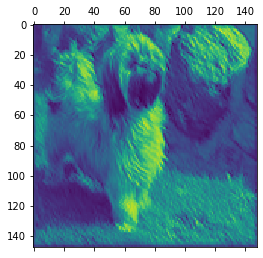

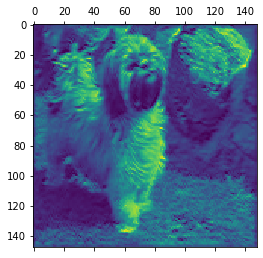

In [18]:
from keras.models import load_model # 导入模型保存工具
import matplotlib.pyplot as plt # 导入matplotlib
model = load_model('../my_dog_cnn.h5') # 载入刚才保存的模型
#绘制特征通道
layer_outputs = [layer.output for layer in model.layers[:16]]
image = X_train[0]
image = image.reshape(1,150,150,3)
activation_model = models.Model(inputs=model.inputs,outputs=layer_outputs)
activations = activation_model.predict(image)
first_layer_activation=activations[0]
plt.matshow(first_layer_activation[0,:,:,2],cmap="viridis")
plt.matshow(first_layer_activation[0,:,:,3],cmap="viridis")

**各种大型卷积网络模型**

上面的图像识别的分类的项目告一段落了.

但是要在这里多说一些科普性的内容。

卷积网络的“始祖”是AlexNet，在ImageNet挑战赛上他曾经一举夺魁，成为深度学习热潮当中的开拓者。自大2012年夺冠到现在，数据科学家们构建出了一个接一个的大型卷积网络模型，这些网络结构上越来越好，预测更加的精准，速度更快，而且通常大型网络都有着更为复杂的拓扑结构。

**VGGNet**

Visual Geometry Group-牛津大学局算计视觉组 和 Google DeepMind公司一起研发出的深度卷积神经网络模型VGGNet，这个模型在某个比赛当中也曾经取得了第一名的成绩，第二名则是Google Net。

VGGNet探索了卷积神经网络的深度于性能之间的关系，成功的构建了16-19层深度的卷积神经网络，证明了增加网络的深度能够在一定程度上影响网络最终的性能，使错误率大幅度的减少；同时，他的拓扑性很强，迁移到其他图像数据上的泛化性也很好。到目前为止，VGGNet仍然被用来提取图像特征。

VGGNet可以看成是加深版本的AlexNet，都是由卷积层，全连接层两个大的部分构成的，关于他的架构，我们简单的说一下。

这个经典的卷积网络的架构，包括了以下的特点。
1. 结构简洁。VGGNet由5层卷积层，3层全连接层，1层SoftMax输出层构成。层和层之间使用最大池化层分开，所有隐层的激活单元都采用ReLU函数。
2. 小卷积核和多卷积子层。VGGNet使用了多个较小的卷积核（3 * 3）的卷积层代替一个较大卷积核的卷积层，这样做一方面可以减少参数，另外一方面相当于进行了更多的非线性映射，可以增加网络的拟合能力。
3. 小池化核。相比AlexNet的3 * 3的池化核，VGGNet全部采用了2 * 2的池化核
4. 通道数多。VGGNet第一层的通道数量为64，后面每一层都进行了翻倍，最多的时候达到了512个通道。通道数的增加，使得更多的信息可以被提取出来。
5. 层数更深，特征图更宽。由于卷积核专注于扩大通道，池化核专注于缩小宽度和高度。使得模型架构上更深，更宽的同时，控制了计算量的增加规模。

后来很多的卷积网络在设计的时候，都借鉴了VGGNet。

我们在上面做的示例，实际上也和VGGNet的架构如出一辙。

**采用Inception结构的GoogleNet**

新型的Inception或者ResNet，比起经典的VGGNet性能更加的优越。其中，Inception的速度更快，ResNet的准确率更高。

GoogleNet，采用的就是Inception结构，也是在2014年左右提出的一种新的深度学习机构。之前的AlexNet、VGGNet等机构都是通过我们单纯的去增加网络的深度（层数）来提高了我们的准确率，由此带来的副作用，包括了过拟合，梯度消失，梯度爆炸等。Inception通过模块串联来更高效的利用计算资源，在相同的计算量下能够提取到更多的特征，从而提升训练结果的准确性。

Inception模块的基本架构，整个Inception结构由多个Inception的模块串联起来的。他的结构的主要贡献有两个：一个是使用1 * 1的卷积来进行升降维，二是使用不同尺寸的卷积核同时进行卷积再聚合。

**残差网络ResNet**

VGGNet和GoogleNet都说明了一个道理：足够的深度他是神经网络模型表现的更良好的前提，但是在网络达到一定的深度之后，迦南地的堆叠的网络反而使效果变差了，这是由于梯度消失和过拟合造成的。

进一步的解决方案就是以前提到过的残差连接结构，通过创建较前面层和较后面层之间的捷径，解决了深度网络中的梯度消失问题。在构建卷积网络的过程当中，残差链接结构构造出来的ResNet可以进一步的提高图像处理的准确率。
残差网络增加了一个恒等映射（identify mapping），把当前输出直接传输给下一层网络，相当于走了一个捷径，跳过了本层运算，同时在反向传播当中，也是将下一层网络的梯度直接传递给上一层网络，这样就能解决深层网络的梯度消失问题。

这些大型卷积网络还有一个非常大的优点，他学到的知识是可以迁移的。也就是，一个训练好的大型卷积网络可以迁移到我们自己的新模型上，来去解决我们的问题。那么如何实现这种神经网络的迁移呢？暂时不说。

下面，我们总结一下卷积网络的特点：
* 局部连接，减少参数，提高效率。
* 通过特征提取把整体特征分解成小特征
* 小特征具有平移不变性，因此出现的各个位置均能够被识别。
* 通过空间层级将深度特征组合，形成整体特征。
* 卷积的原理：抠图，卷积核对扣下来的图进行运算。
* 填充和步幅
* 池化层的功能是对特征图进行下采样。

我们说卷积网络是计算机视觉处理的“利器”，在目前计算机视觉相关的项目实践当中，绝大多数情况都可以看见卷积网络的身影。我们之前就是通过一个小型的卷积网络，实现了对10种不同种类狗的图像的分类。
在这个过程当中，我们用多种方式对网络进行了优化。

我们最后还介绍了一种将卷积网络特征通道可视化的方法，以及几种大型卷积网络模型。